# Weighted sum

In [1]:
import numpy as np
import pandas as pd

In [2]:
nl1=2 #no. of nodes of layer 1
nl2=1 #no. of nodes of layer 2
w=np.array((np.random.rand(nl2,nl1)))
h=np.array((np.random.rand(nl1,1),np.random.rand(nl2,1)))

In [354]:
w

array([[0.14929583, 0.98560306]])

In [355]:
h

array([array([[0.6210334 ],
       [0.71304314]]), array([[0.38694918]])], dtype=object)

## bias

In [6]:
b=np.random.rand(nl2,1)
b

array([[0.61831244]])

# Inputs

In [7]:
h[0][0]=5
h[0][1]=2
h[0]

array([[5.],
       [2.]])

# Weighted sum (Feed forward)

In [8]:
cbs=w.dot(h[0])+b[0,0] #with bias
sbs=w.dot(h[0]) #withoout bias
sbs

array([[3.28621296]])

### Sigmoid function

In [9]:
def sigmoid(z):
 sigma=1/(1+np.exp(-z))
 return sigma
 

##  Perceptron Feedforward

In [10]:
h[0][0]=5
h[0][1]=2
bs=sigmoid(w.dot(h[0])+b[0,0]) #with bias
sbs=sigmoid(w.dot(h[0]))#without bias

print('con bias'+str(bs)+'sin bias'+str(sbs))

con bias[[0.98024751]]sin bias[[0.96395279]]


# Cost function

In [11]:
def cost(y,h):
    C=(y-h)**2
    return C

In [12]:
y=.71
Cb=cost(y,bs)
Cbs=cost(y,sbs)
#Cb=(y-bs)**2
#Cbs=(y-sbs)**2
print('costo con bias'+str(Cb)+'costo sin bias'+str(Cbs))

costo con bias[[0.07303372]]costo sin bias[[0.06449202]]


# Backpropagation

## defining the gradient descents derivates

In [13]:
def dC(y,h): #dC/dh
 dcdh=-2*(y-h)
 return dcdh
def dh(z): #dh/dz
 dhdz=sigmoid(z)*(1-sigmoid(z))
 return dhdz
def dz(h): #dz/dw
 dzdw=h
 return dzdw

In [ ]:
#Training our perceptron

In [364]:
nl1=2 #nodes in Layer 1
nl2=1 #nodes in Layer 2
etha=.1 #Learning rate 
epoc=100 #number of epochs
#alpha=2
w=np.array((np.random.rand(nl2,nl1)))
h=np.array((np.random.rand(nl1,1),np.random.rand(nl2,1)))
b=np.random.rand(nl2,1) #initialize weights, neurons, and bias matrix
print('pesos iniciales',w)
print('bias inicial',b)
#Determine training matrix 
Dw=np.array(np.random.rand(1,2))
y=np.array(.71) #Determine the "correct answer"
h[0][0]=5 
h[0][1]=2 #Determine inputs
costo=[]
pesos=[]
for e in range(epoc):
 #etha=etha*(np.exp(-alpha*e))   #use it carefully for a variable learning rate
 #z=w.dot(h[0])+b 
 pesos.append(w[0])
 z=w.dot(h[0])
 h[1]=sigmoid(z)#without bias
 C=cost(y,h[1])
 #C=(y-h[1])**2
 Dw=np.transpose(dC(y,h[1])*dh(z)*dz(h[0]))
 Db=dC(y,h[1])*dh(z)
 w=w-(etha*Dw)
 b=b-(etha*Db)
 print('costo',C)
 if C==0:
    print('break in epoch',e)
    break
 costo.append(C[0])
# pesos.append(w[0])

pesos iniciales [[0.49939388 0.11720494]]
bias inicial [[0.01985261]]
costo [[0.05237373]]
costo [[0.05032371]]
costo [[0.04807403]]
costo [[0.0456084]]
costo [[0.04291313]]
costo [[0.03997956]]
costo [[0.03680749]]
costo [[0.03340963]]
costo [[0.0298167]]
costo [[0.0260825]]
costo [[0.02228713]]
costo [[0.01853619]]
costo [[0.01495338]]
costo [[0.01166542]]
costo [[0.00878143]]
costo [[0.00637269]]
costo [[0.00446043]]
costo [[0.00301674]]
costo [[0.00197747]]
costo [[0.00126102]]
costo [[0.00078547]]
costo [[0.00047981]]
costo [[0.00028848]]
costo [[0.00017127]]
costo [[0.00010067]]
costo [[5.87134699e-05]]
costo [[3.40387247e-05]]
costo [[1.96427713e-05]]
costo [[1.12952983e-05]]
costo [[6.47773114e-06]]
costo [[3.70730939e-06]]
costo [[2.11845867e-06]]
costo [[1.20912158e-06]]
costo [[6.89498156e-07]]
costo [[3.92919662e-07]]
costo [[2.23796563e-07]]
costo [[1.27419576e-07]]
costo [[7.25258599e-08]]
costo [[4.12719048e-08]]
costo [[2.34825023e-08]]
costo [[1.33591888e-08]]
costo [[

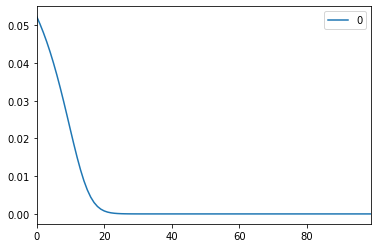

In [365]:
costo1=pd.DataFrame(costo)
costo1.plot()

In [366]:
pesos1=pd.DataFrame(pesos)
pesos1[1]

0     0.117205
1     0.111950
2     0.106444
3     0.100679
4     0.094648
        ...   
95   -0.009415
96   -0.009415
97   -0.009415
98   -0.009415
99   -0.009415
Name: 1, Length: 100, dtype: float64

# Implementation

In [367]:
b #perfect[[-0.06502874]]

array([[-0.04345757]])

In [368]:
w #perfect weight with bias [[0.15726836,0.08703549]] perfect weights without bias [[0.09533541,0.20935351]]

array([[ 0.18284298, -0.00941542]])

In [369]:
h[0][0]=5
h[0][1]=2
bs=sigmoid(w.dot(h[0])+b[0,0]) #con bias
sbs=sigmoid(w.dot(h[0]))#sin bias
sbs

array([[0.71]])

# Weight valley system  visualization

In [370]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [371]:

def z(x,y):
 return (y-sigmoid(x*h[0][0]+y*h[0][1]))**2

def f(height,azimuth):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(-1,1,100)
 w2=np.linspace(-1,1,100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2),cmap='viridis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1]),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1]),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(height,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, height=(0, 90), azimuth=(-90, 90, 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#Usually can be seen nice with height=20 and azimuth=80

interactive(children=(IntSlider(value=45, description='height', max=90), IntSlider(value=0, description='azimu…

In [372]:
def f(height,azimuth):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(pesos1[0][0],pesos1[0][len(pesos1)-1],100)
 w2=np.linspace(pesos1[1][0],pesos1[1][len(pesos1)-1],100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2),cmap='viridis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1]),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1]),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(height,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, height=(-90, 90,10), azimuth=(-90, 90, 5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#Usually can be seen nice with height=20 and azimuth=80

interactive(children=(IntSlider(value=0, description='height', max=90, min=-90, step=10), IntSlider(value=0, d…

In [373]:

def f(altura,azimuth,rang1,rang2):
 fig= plt.figure()
 ax =Axes3D(fig)
 w1=np.linspace(rang1,rang2,100)
 w2=np.linspace(rang1,rang2,100)
 w1, w2 =np.meshgrid(w1,w2)
 ax.plot_surface(w1, w2, z(w1,w2),cmap='viridis')
 ax.scatter3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1]),c='r')
 ax.plot3D(pesos1[0],pesos1[1],z(pesos1[0],pesos1[1]),c='r')
 ax.set_xlabel('w1')
 ax.set_ylabel('w2')
 ax.set_zlabel('c')
 ax.view_init(altura,azimuth)
 plt.show()
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()

interactive_plot = interactive(f, altura=(-90, 90,10), azimuth=(-90, 90, 5),rang1=(0,2,.1),rang2=(-2,0,.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
#w1=np.linspace(pesos1[0][0],pesos1[0][len(pesos1)-1],100)
#w2=np.linspace(pesos1[1][0],pesos1[1][len(pesos1)-1],100)

interactive(children=(IntSlider(value=0, description='altura', max=90, min=-90, step=10), IntSlider(value=0, d…